<a href="https://colab.research.google.com/github/JoaoxCorreia/Dados-IA-Trabalhos/blob/main/techchallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POSTECH - TECH CHALLENGE - FASE 1
## Desafio
Criar um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.
# Conhecendo os dados

Vamos começar com a análise exploratória dos dados, para entender melhor o que temos disponível e como podemos utilizá-los para criar um modelo de machine learning.

In [1]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
dataset.shape

(1338, 7)

O dataset possui 1338 registros de clientes de plano de saúde. Dentre as variáveis disponíveis, temos: idade, sexo, IMC, número de filhos, se é fumante ou não, região onde mora e o custo do plano de saúde.

## Objetivo
**O Objetivo é prever o custo do plano de saúde baseado nas demais variáveis, utilizando de modelos de regressão (Machine Learning), comprovando sua eficacia através de métricas estatísticas.**

In [3]:
dataset.info() # Tem o total de volume de dados e traz informações sobre as colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos observar que não possuímos valores nulos em nosso dataset. Também observamos que possuimos variáveis que não são numéricas, como sexo, fumante e região. Para que possamos utilizar essas variáveis em nosso modelo, precisamos transformá-las em variáveis numéricas.

In [4]:
set(dataset['region']) # Mostra os valores únicos da coluna region

{'northeast', 'northwest', 'southeast', 'southwest'}

In [5]:
dataset['region'].value_counts() # Mostra a quantidade de valores únicos da coluna region

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

O dataset possui uma boa distribuição de dados em relação a região.

In [6]:
dataset['smoker'].value_counts() # Mostra a quantidade de valores únicos da coluna smoker

smoker
no     1064
yes     274
Name: count, dtype: int64

Cerca de 20% do dataset é composto por fumantes.

In [7]:
dataset['sex'].value_counts() # Mostra a quantidade de valores únicos

sex
male      676
female    662
Name: count, dtype: int64

O dataset possui uma boa distribuição de dados em relação ao sexo.

In [8]:
dataset['children'].value_counts() # Mostra a quantidade de valores únicos

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Transformando variáveis categóricas em numéricas

Vamos transformar as variáveis categóricas em numéricas, para que possamos utilizá-las em nosso modelo de machine learning.
- As variáveis sexo e fumante podem serão transformadas em 0 e 1 utilizando o método LabelEncoder.
- A variável região será transformada em novas colunas por região, utilizando o método OneHotEncoder.

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder() # Transforma os valores categóricos em binários

dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
dataset['smoker'] = labelencoder.fit_transform(dataset['smoker'])

onehotencoder = OneHotEncoder() # Transforma os valores categóricos em colunas

region_encoded = onehotencoder.fit_transform(dataset['region'].values.reshape(-1,1)).toarray()

region_df = pd.DataFrame(region_encoded, columns = ['northeast', 'northwest', 'southeast', 'southwest']) # Cria um dataframe com as colunas transformadas

dataset = pd.concat([dataset, region_df], axis=1) # Concatena o dataframe com as colunas transformadas

dataset.drop('region', axis=1, inplace=True) # Remove a coluna region

dataset.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [10]:
dataset.describe() # Mostra a descrição dos dados

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


Podemos observar que as variáveis sexo e fumante foram transformadas em 0 e 1, já a variável região foi transformada em novas colunas por região.

Outra observação importante é que a variável custo do plano de saúde possui uma distribuição assimétrica positiva, ou seja, possui uma concentração maior de valores menores e alguns valores maiores.

## Analisando outliers

Vamos analisar a presença de outliers em nosso dataset. Para isso, vamos plotar um boxplot para cada variável numérica.

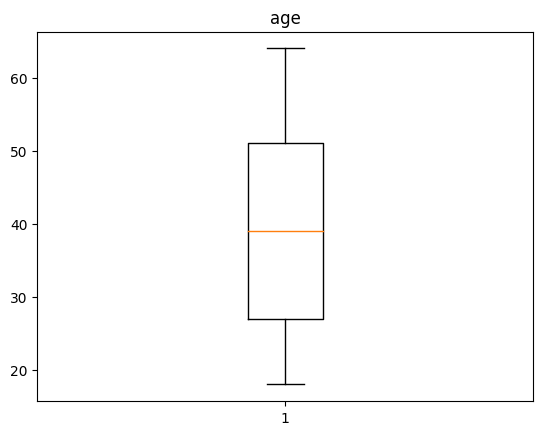

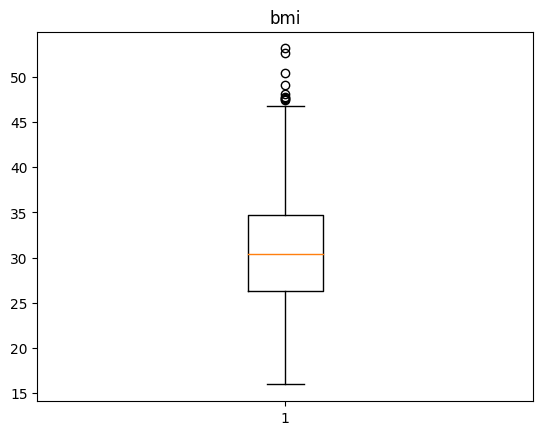

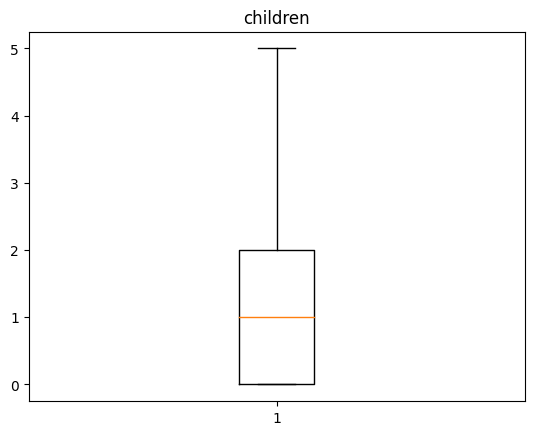

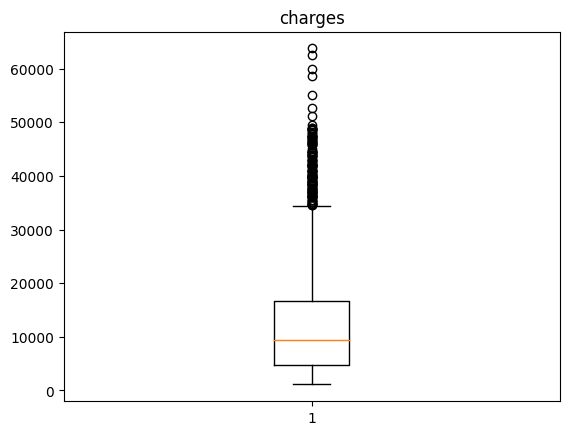

In [11]:
import matplotlib.pyplot as plt

for column in ['age', 'bmi', 'children', 'charges']: # Loop para mostrar o histograma de cada coluna
    plt.boxplot(dataset[column]) # Mostra o boxplot de cada coluna
    plt.title(column) # Título do boxplot
    plt.show() # Mostra o boxplot

### Tratando outliers com a técnica de IQR (Interquartile Range)

Vamos utilizar a técnica de IQR para tratar os outliers em nosso dataset. Para isso, vamos remover os registros que possuem valores discrepantes em relação ao restante dos dados.

In [12]:
# Q1 = dataset['charges'].quantile(0.25)
# Q3 = dataset['charges'].quantile(0.75)
# IQR = Q3 - Q1

# dataset = dataset[(dataset['charges'] >= (Q1 - 1.5 * IQR)) & (dataset['charges'] <= (Q3 + 1.5 * IQR))]

# dataset.head()

**Não utilizamos o trecho de código acima pois constatamos que, ao remover os outliers do conjunto de dados, o resultado do modelo era pior em comparação com a o resultado do conjunto de dados com outliers. Portanto, decidimos não aplicar essa transformação nos dados.**

## Analisando correlações

Vamos analisar a correlação entre as variáveis numéricas do dataset. Para isso, vamos plotar um heatmap com as correlações.

In [13]:
corr_matrix = dataset.corr() # Cria uma matriz de correlação

corr_matrix['charges'].sort_values(ascending=False) # Mostra a correlação de charges com as outras colunas

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
sex          0.057292
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
Name: charges, dtype: float64

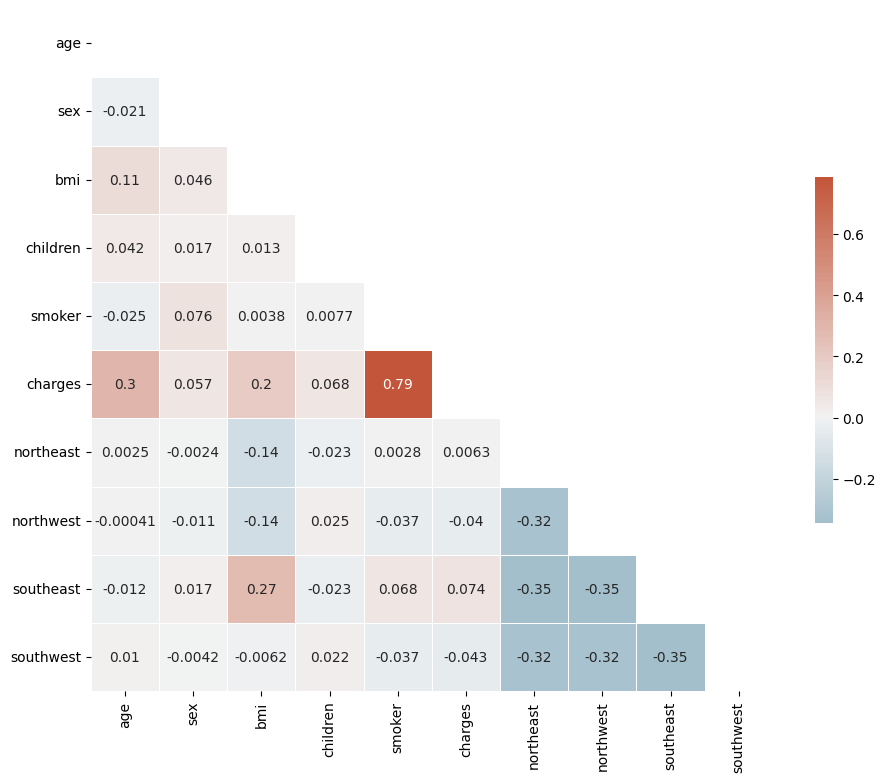

In [14]:
import numpy as np
import seaborn as sns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Cria uma máscara para o triângulo superior

f, ax = plt.subplots(figsize=(11, 9)) # Tamanho do gráfico

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Paleta de cores

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Cria o heatmap

plt.show() # Mostra o heatmap

A partir da análise do heatmap, podemos observar que a variável que mais influencia no custo do plano de saúde é se o cliente é fumante ou não, seguido de idade e IMC.

## Separando base de treino e teste com estratificação

Vamos separar a base de dados em treino e teste, utilizando a técnica de estratificação para garantir que a distribuição dos dados seja a mesma em ambas as bases (treino e teste).

Escolhemos estratificar com a variável fumante, pois é a variável que mais influencia no custo do plano de saúde.

In [15]:
from sklearn.model_selection import train_test_split

X = dataset[['age','bmi', 'children', 'smoker']] # Features
y = dataset['charges'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=dataset['smoker']) # Divide os dados em treino e teste

print(X_train['smoker'].value_counts() / len(X_train)) # Mostra a quantidade de fumantes e não fumantes no treino
print(X_test['smoker'].value_counts() / len(X_test)) # Mostra a quantidade de fumantes e não fumantes no teste

smoker
0    0.795327
1    0.204673
Name: count, dtype: float64
smoker
0    0.794776
1    0.205224
Name: count, dtype: float64


Podemos observar que a base de treino e teste possuem a mesma distribuição de fumantes devido a estratificação.

## Aplicando normalização

Vamos aplicar a normalização com MinMaxScaler para que as variáveis numéricas fiquem na mesma escala.

Aplicamos para a base de treino o método fit_transform e para a base de teste o método transform.
Dessa forma, garantimos que a base de teste não influencie na normalização dos dados.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['age','bmi', 'children']] = scaler.fit_transform(X_train[['age','bmi', 'children']]) # Ajusta e transforma os dados de treino
X_test[['age','bmi', 'children']] = scaler.transform(X_test[['age','bmi', 'children']]) # Transforma os dados de teste

In [17]:
X_train.describe() # Mostra a descrição dos dados de treino

,age,bmi,children,smoker
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.459386,0.398394,0.221308,0.204673
std,0.305172,0.162660,0.242057,0.403651
min,0.000000,0.000000,0.000000,0.000000
25%,0.179348,0.281780,0.000000,0.000000
50%,0.456522,0.391041,0.200000,0.000000
75%,0.717391,0.501480,0.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [18]:
X_test.describe() # Mostra a descrição dos dados de teste

,age,bmi,children,smoker
count,268.000000,268.000000,268.000000,268.000000
mean,0.467554,0.384304,0.209701,0.205224
std,0.306962,0.169386,0.237455,0.404621
min,0.000000,0.023002,0.000000,0.000000
25%,0.195652,0.262039,0.000000,0.000000
50%,0.467391,0.374092,0.200000,0.000000
75%,0.739130,0.504641,0.400000,0.000000
max,1.000000,0.854991,1.000000,1.000000


## Testando modelos de regressão

Criaremos uma função para calcular as métricas de avaliação do modelo.

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_metrics(y_test, y_pred, model): # Função para mostrar as métricas
    metrics = {
        "Raiz do Erro Quadrático Médio": np.sqrt(mean_squared_error(y_test, y_pred)), # Calcula a raiz do erro quadrático médio
        "Erro Absoluto Médio": mean_absolute_error(y_test, y_pred), # Calcula o erro absoluto médio
        "R2 Score": r2_score(y_test, y_pred), # Calcula o R2 Score
        "Erro Percentual Absoluto Médio": np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Calcula o erro percentual absoluto médio
    }

    # Mostra as métricas
    print(f'Para o modelo {model.__class__.__name__} temos as seguintes métricas:\n')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

Criaremos também, uma função para plotar o gráfico de dispersão entre os valores reais e os valores previstos pelo modelo.

In [20]:
def plot_scatter(y_test, y_pred_lin_reg):
    plt.scatter(y_test, y_pred_lin_reg, color='red', label='Previsto')
    plt.scatter(y_test, y_test, color='blue', label='Real')
    plt.xlabel('Gastos Reais')
    plt.ylabel('Gastos Previstos')
    plt.title('Gastos Reais x Gastos Previstos')
    plt.legend()
    plt.show()

Agora, vamos testar diferentes modelos de regressão, para prever o custo do plano de saúde.

### Regressão Linear

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Cria o modelo de regressão linear

lin_reg.fit(X_train, y_train) # Treina o modelo

y_pred_lin_reg = lin_reg.predict(X_test) # Faz a predição

print_metrics(y_test, y_pred_lin_reg, lin_reg) # Mostra as métricas

Para o modelo LinearRegression temos as seguintes métricas:

Raiz do Erro Quadrático Médio: 5571.369083274044
Erro Absoluto Médio: 3873.697236144734
R2 Score: 0.7896054282061097
Erro Percentual Absoluto Médio: 38.85428972110475


##### Gráfico de dispersão com a Regressão Linear:

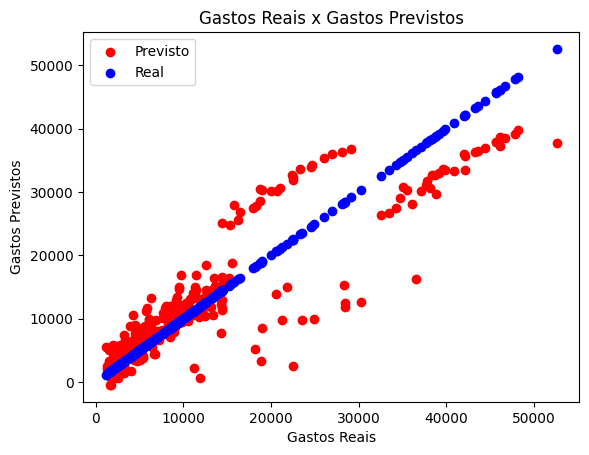

In [22]:
plot_scatter(y_test, y_pred_lin_reg) # Mostra o gráfico de dispersão

### Árvore de Decisão

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() # Cria o modelo de árvore de decisão

tree_reg.fit(X_train, y_train) # Treina o modelo

y_pred_tree_reg = tree_reg.predict(X_test) # Faz a predição

print_metrics(y_test, y_pred_tree_reg, tree_reg) # Mostra as métricas

Para o modelo DecisionTreeRegressor temos as seguintes métricas:

Raiz do Erro Quadrático Médio: 6284.381546392559
Erro Absoluto Médio: 3025.4245620895526
R2 Score: 0.7323077732053107
Erro Percentual Absoluto Médio: 36.72197629368702


##### Gráfico de dispersão com a Árvore de Decisão:

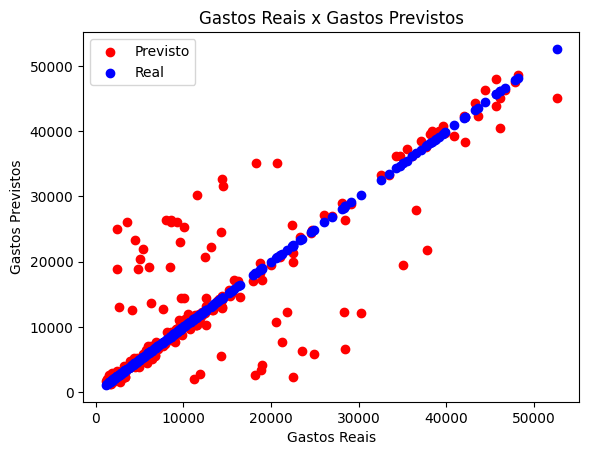

In [24]:
plot_scatter(y_test, y_pred_tree_reg) # Mostra o gráfico de dispersão

### Floresta Aleatória

In [25]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=130, random_state=42) # Cria o modelo de floresta aleatória

forest_reg.fit(X_train, y_train) # Treina o modelo

y_pred_forest_reg = forest_reg.predict(X_test) # Faz a predição

print_metrics(y_test, y_pred_forest_reg, forest_reg) # Mostra as métricas

Para o modelo RandomForestRegressor temos as seguintes métricas:

Raiz do Erro Quadrático Médio: 4795.673742830334
Erro Absoluto Médio: 2742.980837897672
R2 Score: 0.8441129888079135
Erro Percentual Absoluto Médio: 36.85940353770753


##### Gráfico de dispersão com a Floresta Aleatória:

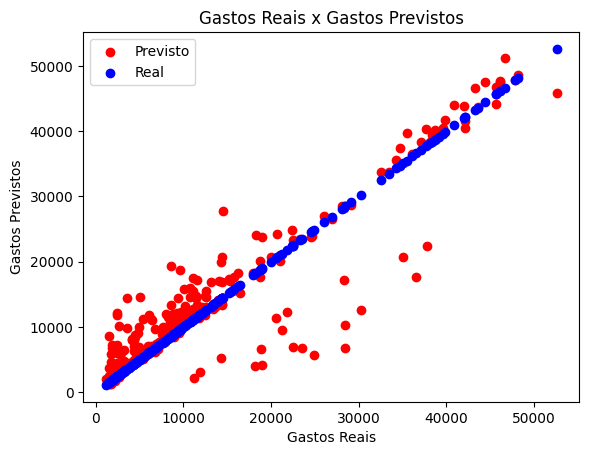

In [26]:
plot_scatter(y_test, y_pred_forest_reg) # Mostra o gráfico de dispersão

## Conclusão

A partir da análise dos modelos de regressão, com métricas estatísticas e visualização dos gráficos, podemos observar que a Floresta Aleatória obteve o melhor desempenho, com a raiz do erro quadrático médio de aproximadamente \$4795.67, erro absoluto médio de aproximadamente \$2742.98, R2 score de aproximadamente 84% e erro percentual absoluto médio de aproximadamente 36.85%.

Portanto, podemos concluir que a Floresta Aleatória é o melhor modelo para prever o custo do plano de saúde baseado nas demais variáveis disponíveis no dataset.